# Proyecto Final Parcial 2!!
### Estructuras Computacionales

En este jupyter notebook se muestran los __algoritmos__ realizados durante el curso de __Estructuras Computacionales II__, los cuales son listados a continuacion.

* Matriz de Adyacencia.
* Lista de Adyacencia.
* Recorrido de anchura.
* Recorrido en profundidad.
* Grafo conexo.
* Algoritmo de dijkstra.

Nota. Todos estos algoritmos estaran compuestos de en un solo archivo .py, para mantener el codigo correctamente organizado haremos uso de la POO.

#### Main Class
Clase principal que contendra todos los __algoritmos__.

Hagan sus programas en el metodo que le corresponde, si quieren definir variables que se inicializen 
al instanciar la clase de **Estructuras_Computacionales** ponganlas en el metodo **init** y comenten arriba del metodo colocando el algoritmo que estan desarrollando y para que es la variable que estan definiendo. Si quieren pueden utilizar variables de otros.

Para definir las variables deben usar '**self.variable = valor**' si quieren que el metodo sea privado usen
'**self.\__variable = valor**', y ya.

Cuando esten en github hagan un **fork** del repositorio del codigo para que lo copien, despues creen una rama que tenga el nombre del algoritmo que estan haciendo para que empiezen a hacer su parte.

In [30]:
import heapq
import numpy as np

In [31]:

class Unidad2:
    """
        La variable 'M_Adyacencia' es la matriz de adyacencia que se capturara en durante la ejecucion del método Matriz_Adyacencia.
        
        La variable 'lista' será utilizada para obtener una lista de adyancia que representará un grafo que sera capturado con el método Lista_Adyacencia.
    
        La variable 'matriz' es un grafo de ejemplo definido como su matriz de adyacencia ya que es necesaria para el algoritmo de componentes conexas.
        El metodo 'Grafo_Conexo' usa la variable 'matriz', la modifica para calcular la matriz de caminos e imprime las componentes conexas resultantes.
    """
    def __init__(self, numNodos=1, vertices=[1]):
        self.M_Adyacencia = np.zeros([numNodos, numNodos])
        
        self.lista = {v: [] for v in vertices}
        
        self.matriz = [[0, 0, 0, 1, 1, 0],
                       [0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 1],
                       [1, 1, 1, 0, 0, 0],
                       [0, 1, 1, 0, 0, 1],
                       [0, 0, 0, 0, 1, 0]]
        
        self.grafo = {
                        0: {3: 1, 4: 1},
                        1: {},
                        2: {5: 1},
                        3: {0: 1, 1: 1, 2: 1},
                        4: {1: 1, 2: 1, 5: 1},
                        5: {4: 1}}


    def Matriz_Adyacencia(self, numAristas):
        # Captura de los aristas del grafo no dirigido
        for i in range(numAristas):
            nodo1 = int(input("Ingresa el 1er vertice: "))
            nodo2 = int(input("ingresa el 2do vertice: "))
            self.M_Adyacencia[nodo1][nodo2] = 1
            self.M_Adyacencia[nodo2][nodo1] = 1
        
        # Impresion de la matriz de adyacencia
        print(self.M_Adyacencia)

    def Lista_Adyacencia(self, numAristas):
        # Captura de los aristas del grafo dirigido
        for i in range(numAristas):
            u = input("Ingrese el 1er vertice: ")
            v = input("Ingrese el 2do vertice: ")
            self.lista[u].append(v)
        
        # Impresion de la lista de adyacencia
        for nodo, adyacentes in self.lista.items():
            print(f'{nodo}: {adyacentes}')

    def Recorrido_Anchura(self):
        self.__cola = []    # Lista para representar la cola
        self.__cola.append(0)   # Metemos a la cola el 0 para representar el vertice A
        self.__visitados = [True, False, False, False, False, False]
        
        print("El recorrido por anchura es: ")
        while(len(self.__cola) != 0):   # Mientras la cola no este vacia
            element = self.__cola.pop(0)    # Sacamos el primer elemento de la cola
            print(chr(element + 65))
            
            for i, relacion in enumerate(self.matriz[element]):    # Checamos las relaciones del nodo actual con todos los demas nodos
                if relacion == 1 and self.__visitados[i] == False: # Si aun no se visita el nodo y se tiene relacion (1) con otro nodo, este se mete a la cola y se marca como visitado
                        self.__visitados[i] = True
                        self.__cola.append(i)

    def Recorrido_Profundidad(self):
        self.__pila = []    # Lista para representar la pila
        self.__pila.append(0)   # Metemos a la pila el 0 para representar el vertice A
        self.__visitados = [True, False, False, False, False, False]
        
        print("El recorrido por profundidad es: ")
        while(len(self.__pila) != 0):   # Mientras la cola no este vacia
            element = self.__pila.pop()  # Sacamos el ultimo elemento de la pila
            print(chr(element + 65))
            
            for i, relacion in enumerate(self.matriz[element]):    # Checamos las relaciones del nodo actual con todos los demas nodos
                if relacion == 1 and self.__visitados[i] == False:  # Si aun no se visita el nodo y si hay relacion (1) con otro nodo, este se mete a la pila y se marca como visitado
                        self.__visitados[i] = True
                        self.__pila.append(i)

    def Grafo_Conexo(self):
        self.__tam_matriz = len(self.matriz) #Tamano de la matriz o numero de vertices.
        self.__vertices = list(range(self.__tam_matriz)) #Vector auxiliar para saber el orden de los nodos una vez que se modifique la matriz.

        # Ciclo para llenar la diagonal principal con unos.
        for i in range(self.__tam_matriz):
            self.matriz[i][i] = 1

        # Ciclo para calcular la matriz de caminos.
        for i in range(self.__tam_matriz):
            j = 0
            temp = [False for k in range(self.__tam_matriz)] #Vector temporal para saber los nodos 'visitados'.
            temp[i] = True
            while j < self.__tam_matriz:
                if self.matriz[i][j] == 1 and not temp[j]:
                    for k, n in enumerate(self.matriz[j]):
                        self.matriz[i][k] = n if n == 1 else self.matriz[i][k]
                    temp[j] = True
                    j = 0
                    continue
                j += 1

        # Metodo de la burbuja para ordenar las filas de la matriz.
        for i in range(self.__tam_matriz - 1):
            for j in range(i + 1, self.__tam_matriz):
                if self.matriz[i].count(1) < self.matriz[j].count(1):
                    self.matriz[j], self.matriz[i] = self.matriz[i], self.matriz[j]
                    self.__vertices[j], self.__vertices[i] = self.__vertices[i], self.__vertices[j] #Cambio del orden de los nodos en el vector auxiliar.

        # Metodo de la burbuja para ordenar las columnas de la matriz.
        for i in range(self.__tam_matriz - 1):
            coli = [self.matriz[k][i] for k in range(self.__tam_matriz)]
            for j in range(i + 1, self.__tam_matriz):
                colj = [self.matriz[k][j] for k in range(self.__tam_matriz)]
                if coli.count(1) > colj.count(1):
                    for k in range(self.__tam_matriz):
                        self.matriz[k][i], self.matriz[k][j] = self.matriz[k][j], self.matriz[k][i]
                    coli, colj = colj, coli

        # Resultado
        print('Componentes conexas:')
        print('v1 = {', end = '')
        contador = 1
        for i in range(self.__tam_matriz - 1):
            print(chr(self.__vertices[i] + 65), end = '')
            if (self.matriz[i + 1][i] == 0):
                print('}')
                contador += 1
                print(f'v{contador} = {{', end = '')
                continue
            print(', ', end = '')
        print(f'{chr(self.__vertices[-1] + 65)}}}')

##------------------------------------------- ALGORITMO DE DIJKSTRA ----------------------------------------------------------------
    def Dijkstra(self, grafo, inicio):
        #Inicializar las distancias y el conjunto de nodos visitados
        distancias = {nodo: float('inf') for nodo in grafo}
        distancias[inicio] = 0

        #Usar una cola de prioridad para mantener los nodos no visitados
        cola_prioridad = [(0, inicio)]

        while cola_prioridad:
            #Obtener el nodo con la distancia más corta
            distancia_actual, nodo_actual = heapq.heappop(cola_prioridad)

            #Si la distancia actual es mayor que la conocida, ignorar este nodo
            if distancia_actual > distancias[nodo_actual]:
                continue

            #Explorar los nodos vecinos del nodo actual
            for vecino, peso in grafo[nodo_actual].items():
                distancia = distancia_actual + peso

                #Si encontramos una distancia más corta, actualizar
                if distancia < distancias[vecino]:
                    distancias[vecino] = distancia
                    #Agregar el vecino a la cola de prioridad
                    heapq.heappush(cola_prioridad, (distancia, vecino))
        return distancias

In [32]:
obj = Unidad2()

Matriz de Adyacencia

In [10]:
numNodos = int(input("Ingresa numero de nodos del grafo: "))
numAristas = int(input("Ingresa numero de aristas del grafo: "))

print("Los vertices son:", end=" ")
for i in range(numNodos):
    print(i, end=", ")
print()

matriz = Unidad2(numNodos)
matriz.Matriz_Adyacencia(numAristas)

Los vertices son: 0, 1, 2, 3, 4, 
[[0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 1. 1. 0. 1.]
 [0. 0. 0. 1. 0.]]


Lista de Adyacencia

In [ ]:
numNodos = int(input("Ingrese el numero de vertices: "))
numAristas = int(input("Ingrese el numero de aristas: "))

vertices = []

for i in range(numNodos):
    vertices.append(chr(i + 65))

print("Los vertices son: ", vertices)

lista = Unidad2(numNodos, vertices)
lista.Lista_Adyacencia(numAristas)

Los vertices son:  ['A', 'B', 'C', 'D', 'E']
A: ['B', 'C']
B: ['D', 'E']
C: ['D']
D: ['A']
E: ['D', 'E']


Recorrido en Anchura

In [14]:
obj.Recorrido_Anchura()

El recorrido por anchura es: 
A
D
E
B
C
F


Recorrido en Profundidad

In [15]:
obj.Recorrido_Profundidad()

El recorrido por profundidad es: 
A
E
F
C
B
D


Algoritmo de Dijkstra

In [6]:
nodo_inicio = 0
resultado = obj.Dijkstra(obj.grafo, nodo_inicio)
print(f"Distancias más cortas desde el nodo {nodo_inicio}: {resultado}")

Distancias más cortas desde el nodo 0: {0: 0, 1: 2, 2: 2, 3: 1, 4: 1, 5: 2}


Grafo Conexo

In [7]:
obj.Grafo_Conexo()

Componentes conexas:
v1 = {A, D}
v2 = {C, E, F}
v3 = {B}


# Proyecto Final Parcial 3!!

***Algoritmos de Proyecto Final:***

- Unidad 3 

  * Programas para hacer el pareo de un grafo normal.
  * Programas para hacer el pareo de un grafo bipartido.
  * N problemas y modelado correspondiente de Pareo en grafos. N = cantidad de integrantes / 2. Tratar en los N problemas exista al menos uno de cada tipo: pareos perfectos, pareos maximales mínimos y pareos maximales       máximos. 
  * Investigar el concepto de pareos maximales mínimos.
 
 - Unidad 4

    * Programas Primero en Anchura y Primero en Profundidad para grafos dirigidos.
    * Comparación DFS y BFS con los algoritmos de grafos dirigidos y grafos no dirigidos.
    * N problemas y modelado correspondiente de grafos dirigidos ponderado o no. N = cantidad de integrantes / 2.

**Realizar la fotografía de equipo: Indicar en una tabla de cada integrante el entendimiento de cada programa realizado.**

![Python](https://th.bing.com/th/id/R.943803c137dc211e2279dbe80a17c401?rik=bS3wZ6WGrxGwtg&pid=ImgRaw&r=0)

## **Algoritmos y Problemas de Unidad III**

In [306]:
import matplotlib.pyplot as plt
import networkx as nx

class Unidad3:
    def __init__(self):
        self.bipartite_graph = [
            [0,1,0,1,1,0,0,0],
            [1,0,1,0,0,1,0,0],
            [0,1,0,1,0,0,1,0],
            [1,0,1,0,0,0,0,1],
            [1,0,0,0,0,1,0,1],
            [0,1,0,0,1,0,1,0],
            [0,0,1,0,0,1,0,1],
            [0,0,0,1,1,0,1,0],
        ]

        
    def pareo_grafo(self):
        pass
    
    
    """
        El siguiente Metodo nos ayuda en el Pareo de un Grafo Bipartito, primeramente
        con ayuda de unas funciones comprobamos que en efecto el grafo ingresado es Bipartito,
        para asi continuar con el pareo del Grafo.
    """
    def pareo_grafo_bipartido(self):
        # ------------------------------------------------------------------------
        # Funcion para graficar el Grafo Bipartito, diferenciando los nodos
        # que pertenecen al grupo u y v, ademas de agregar el emparejamiento
        # realizado.
        def plot_network(emp):
            # Crear el Grafo
            G = nx.Graph()
            # Agregar Nodos
            nodes = [i for i in range(1, len(self.bipartite_graph)+1)]
            G.add_nodes_from(nodes)
            # Agregar Bordes
            edges = []
            for i, row in enumerate(graph):
                for j, n in enumerate(row):
                    if n == 1:
                        edges.append( (i+1, j+1) )
            G.add_edges_from(edges)

            # Definir un color para cada grupo
            nodes_color = ["black" if g else "red" for g in self.groups]
            # Definir un color para cada emparejamiento
            edges_color = ["purple" if set(edg) in self.pairs else "gray" for edg in G.edges]
            
            # Graficar grafo.
            pos = nx.spring_layout(G)
            nx.draw(G, pos, with_labels= True, node_size= 700, 
                    node_color= nodes_color, font_size= 10, font_color= 'white', edge_color= edges_color,
                   linewidths= 1, alpha= 0.9, width = 5)

            # Mostrar el Grafo
            plt.text(x=-1.2, y=-1.2, s= f"Emparejamientos Maximos: {emp}", size= 12)
            plt.title('Emparejamiento de Grafo Bipartito')
            plt.show()
        
        # ------------------------------------------------------------------------
        # Las siguiente funciones comprueban si el Grafo es Bipartito y se obtienen
        # los vertices pertenecientes a cada grupo.
        def find_match(node, color, colors, graph):
            colors[node] = color
            for i, adj in enumerate(graph[node]):
                if adj:
                    if colors[i] == color:# Search for adjacent Nodes with the same color.
                        return False  
                    elif colors[i] == -1:
                        find_match(i, 0 if color else 1, colors, graph) # Assing a color for the node i.
            return True

        def is_bipartite(graph, colors):
            color = 0
            isin = False
            for node in range(len(graph)):
                if colors[node] == -1:
                    if isin:
                        return False # The graph is not connected.
                    isin = True

                    if not find_match(node, color, colors, graph):
                        return False # An adjacent node with same color was found.
            return True
        
        # ------------------------------------------------------------------------
        # Estas funciones realizan el pareo del Grafo bipartito una vez que se comprobo
        # que en efecto el grafo ingresado es bipartito.
        
        # Retorna un Booleano si aun existen rutas aumentadas.
        def bfs():
            Q = Queue()
            for u in range(1, self.__m+1):
                if self.pairU[u] == NIL:
                    self.dist[u] = 0
                    Q.put(u)
                else:
                    self.dist[u] = INF
            self.dist[NIL] = INF
            while not Q.empty():
                u = Q.get()
                if self.dist[u] < self.dist[NIL]:
                    for v in self.__adj[u]:
                        if self.dist[self.pairV[v]] == INF:
                            self.dist[self.pairV[v]] = self.dist[u] + 1
                            Q.put(self.pairV[v])
            return self.dist[NIL] != INF

        # Retorna True si se encontro una rutas aumentadas iniciando desde un vertice libre y
        # terminando en otro y asigna las parejas.
        def dfs(u):
            if u != NIL:
                for v in self.__adj[u]:
                    if self.dist[self.pairV[v]] == self.dist[u] + 1:

                        if dfs(self.pairV[v]):
                            self.pairV[v] = u
                            self.pairU[u] = v
                            return True

                self.dist[u] = INF
                return False
            return True
        
        def hopcroftKarp():
            self.pairU = [0 for _ in range(self.__m+1)]
            self.pairV = [0 for _ in range(self.__n+1)]
            self.dist = [0 for _ in range(self.__m+1)]
            result = 0
            while bfs():
                for u in range(1, self.__m+1):
                    if self.pairU[u] == NIL and dfs(u):
                        result += 1
            return result
        
        # ------------------------------------------------------------------------
        # En esta seccion se hace uso de las anteriores funciones para obtener el 
        # emparejamiento del grafo bipartito.
        
        graph = self.bipartite_graph     # Variable de la Clase.
        colors = [-1] * len(self.bipartite_graph)
        
        if is_bipartite(graph, colors):
            u = []
            v = []
            for i in range(len(graph)):
                if colors[i]: 
                    v.append(i)
                else: 
                    u.append(i)
            self.__m = len(u)
            self.__n = len(v)
            self.__adj =[[] for _ in range(self.__m+1)]

            for i, n in enumerate(u):
                for j, node  in enumerate(np.array(graph[n])[v]):
                    if node == 1:
                        self.__adj[i+1].append(j+1)
            
            result = hopcroftKarp()
            self.pairs = [set((u[n1-1]+1,v[n2-1]+1))  for n1,n2 in zip(self.pairU[1:],self.pairV[1:])]
            self.groups = colors
            
            # Graficar el Grafo con el Respectivo Emparejamiento y Division Bipartita.
            plot_network(result)
            
        else:
            print("* El Grafo No es Bipartito.")

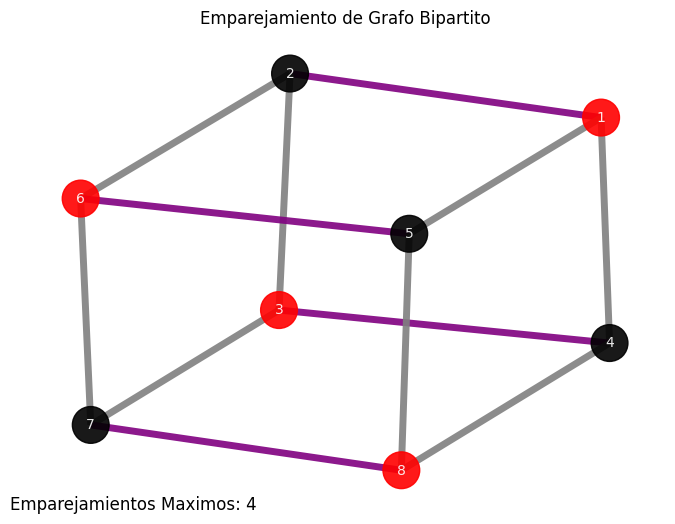

In [318]:
# Ejecucion del Emparejamiento del Grafo Bipartito
obj = Unidad3()
obj.pareo_grafo_bipartido()

### A continuacion se redactan los N *problemas* de ***Pareo de Grafos***.

* **Problema 1:** Encuentre la determinante de la siguiente matriz.

$ M = \begin {pmatrix}
    1 & 2 & 3\\
    4 & 5 & 6
    \end {pmatrix} \in \mathbb R_{2\times3}
$


* **Problema 2:** Encuentre una base para el siguiente vector.

$\vec{v} = (v_1, v_2, v_3, \cdots, v_n) \in \mathbb R^n$


* **Problema 3:** Calcule el siguiente determinante mediant cofactores.

$\det A =  \begin {vmatrix}
    8 & 4 & 1 & 4\\
    9 & 1 & 3 & 1\\
    1 & 2 & 5 & 43\\
    \end {vmatrix}$

* **Problema 4:** Encuentre una base para el siguiente vector.

$\vec{v} = (v_1, v_2, v_3, \cdots, v_n) \in \mathbb R^n$


* **Problema 5:** Calcule el siguiente determinante mediant cofactores.

$\det A =  \begin {vmatrix}
    8 & 4 & 1 & 4\\
    9 & 1 & 3 & 1\\
    1 & 2 & 5 & 43\\
    \end {vmatrix}$

### Investigacion sobre pareos maximales mínimos

Inspired by the many excellent lorem ipsum generators, this simple webapp generates placeholder text. However, instead of generating plain text, this generator gives you structured text in the form of markdown. In order to do so, it uses Markov Chains and many heuristics. It was written in Haskell and the source code is available on GitHub. Crafted with a lot of love for the markdown format by Jasper Van der Jeugt. An HTTP API is also available!

Quidem habitavit verso conlucere: alendi et solae, et, tristis sine omne est?
Dare consorte maciem, **est neque vacuas** et locutus? Maior secuta silva
volucres telluris mirantur monte, victa fui pariter vocat uterque color elisa,
non via causa navem.

Persequar contendisse tandem Pelia lactentis longius quamquam deus, lumina
cognoscere impedit incerto sedes. Oculis lyncas amnes canem, vimque quas dare;
vulnere remigioque claro surgimus forma turba tibi confiteorque. Sublime, debueram, actusque; in, di toto tempestiva
inops, nec filis, ruris.

## **Algoritmos y Problemas de Unidad IV**

Realizar una comparacion en los algoritmos de **Anchura y Profundidad** para grafos **dirigidos y no dirigidos**, se puede medir el tiempo de ejecucion de un algoritmo usando %%timeit al inicio de la celda.

In [78]:
class Unidad4:
    def __init__(self):
        self.grafo_ND = [
            [0, 1, 1, 0, 1, 0],
            [1, 0, 0, 1, 0, 0],
            [1, 0, 0, 1, 1, 0],
            [0, 1, 1, 0, 0, 1],
            [1, 0, 1, 0, 0, 1],
            [0, 0, 0, 1, 1, 0],
        ]

        self.grafo_D = [
            [0, 1, 0, 0, 1, 0],
            [0, 0, 0, 1, 0, 0],
            [1, 0, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 1],
            [0, 0, 1, 0, 0, 0],
            [0, 0, 0, 0, 1, 0],
        ]

    def anchura_grafo_dirigido(self):
        self.__cola = []  # Lista para representar la cola
        self.__cola.append(0)  # Metemos a la cola el 0 para representar el vertice A
        self.__visitados = [True, False, False, False, False, False]

        print("El recorrido por anchura es: ")
        while len(self.__cola) != 0:  # Mientras la cola no este vacia
            element = self.__cola.pop(0)  # Sacamos el primer elemento de la cola
            print(chr(element + 65))

            for i, relacion in enumerate(
                self.grafo_D[element]
            ):  # Checamos las relaciones del nodo actual con todos los demas nodos
                if (
                    relacion and self.__visitados[i] == False
                ):  # Si aun no se visita el nodo y se tiene relacion (1) con otro nodo, este se mete a la cola y se marca como visitado
                    self.__visitados[i] = True
                    self.__cola.append(i)

    def profundidad_grafo_dirigido(self):
        self.__pila = []  # Lista para representar la pila
        self.__pila.append(0)  # Metemos a la pila el 0 para representar el vertice A
        self.__visitados = [True, False, False, False, False, False]

        print("El recorrido por profundidad es: ")
        while len(self.__pila) != 0:  # Mientras la cola no este vacia
            element = self.__pila.pop()  # Sacamos el ultimo elemento de la pila
            print(chr(element + 65))

            for i, relacion in enumerate(self.grafo_D[element]):  # Checamos las relaciones del nodo actual con todos los demas nodos
                if (
                    relacion and self.__visitados[i] == False
                ):  # Si aun no se visita el nodo y se tiene relacion (1) con otro nodo, este se mete a la cola y se marca como visitado
                    self.__visitados[i] = True
                    self.__pila.append(i)

    def anchura_grafo_no_dirigido(self):
        self.__cola = []  # Lista para representar la cola
        self.__cola.append(0)  # Metemos a la cola el 0 para representar el vertice A
        self.__visitados = [True, False, False, False, False, False]

        print("El recorrido por anchura es: ")
        while len(self.__cola) != 0:  # Mientras la cola no este vacia
            element = self.__cola.pop(0)  # Sacamos el primer elemento de la cola
            print(chr(element + 65))

            for i, relacion in enumerate(
                self.grafo_ND[element]
            ):  # Checamos las relaciones del nodo actual con todos los demas nodos
                if (
                    relacion and self.__visitados[i] == False
                ):  # Si aun no se visita el nodo y se tiene relacion (1) con otro nodo, este se mete a la cola y se marca como visitado
                    self.__visitados[i] = True
                    self.__cola.append(i)

    def profundidad_grafo_no_dirigido(self):
        self.__pila = []  # Lista para representar la cola
        self.__pila.append(0)  # Metemos a la cola el 0 para representar el vertice A
        self.__visitados = [True, False, False, False, False, False]

        print("El recorrido por anchura es: ")
        while len(self.__pila) != 0:  # Mientras la cola no este vacia
            element = self.__pila.pop()  # Sacamos el primer elemento de la cola
            print(chr(element + 65))

            for i, relacion in enumerate(
                self.grafo_ND[element]
            ):  # Checamos las relaciones del nodo actual con todos los demas nodos
                if (
                    relacion and self.__visitados[i] == False
                ):  # Si aun no se visita el nodo y se tiene relacion (1) con otro nodo, este se mete a la cola y se marca como visitado
                    self.__visitados[i] = True
                    self.__pila.append(i)

In [35]:
obj = Unidad4()
obj.anchura_grafo_dirigido()

El recorrido por anchura es: 
A
D
E
B
C
F


In [73]:
obj.anchura_grafo_no_dirigido()

El recorrido por anchura es: 
A
D
E
F
C


In [74]:
obj.profundidad_grafo_dirigido()

El recorrido por profundidad es: 
A
E
F
C
B
D


In [81]:
obj.profundidad_grafo_no_dirigido()

El recorrido por anchura es: 
A
E
F
C
D


### Comparacion de DFS y BFS

Inspired by the many excellent lorem ipsum generators, this simple webapp generates placeholder text. However, instead of generating plain text, this generator gives you structured text in the form of markdown. In order to do so, it uses Markov Chains and many heuristics. It was written in Haskell and the source code is available on GitHub. Crafted with a lot of love for the markdown format by Jasper Van der Jeugt. An HTTP API is also available!

Quidem habitavit verso conlucere: alendi et solae, et, tristis sine omne est?
Dare consorte maciem, **est neque vacuas** et locutus? Maior secuta silva
volucres telluris mirantur monte, victa fui pariter vocat uterque color elisa,
non via causa navem.

Persequar contendisse tandem Pelia lactentis longius quamquam deus, lumina
cognoscere impedit incerto sedes. Oculis lyncas amnes canem, vimque quas dare;
vulnere remigioque claro surgimus forma turba tibi confiteorque. Sublime, debueram, actusque; in, di toto tempestiva
inops, nec filis, ruris.

### A continuacion se redactan los N *problemas* de ***Pareo de Grafos***.

* **Problema 1:** Encuentre la determinante de la siguiente matriz.

$ M = \begin {pmatrix}
    1 & 2 & 3\\
    4 & 5 & 6
    \end {pmatrix} \in \mathbb R_{2\times3}
$


* **Problema 2:** Encuentre una base para el siguiente vector.

$\vec{v} = (v_1, v_2, v_3, \cdots, v_n) \in \mathbb R^n$


* **Problema 3:** Calcule el siguiente determinante mediant cofactores.

$\det A =  \begin {vmatrix}
    8 & 4 & 1 & 4\\
    9 & 1 & 3 & 1\\
    1 & 2 & 5 & 43\\
    \end {vmatrix}$

* **Problema 4:** Encuentre la determinante de la siguiente matriz.

$ M = \begin {pmatrix}
    1 & 2 & 3\\
    4 & 5 & 6
    \end {pmatrix} \in \mathbb R_{2\times3}
$


* **Problema 5:** Encuentre una base para el siguiente vector.

$\vec{v} = (v_1, v_2, v_3, \cdots, v_n) \in \mathbb R^n$